# Trend Analysis - Graph Viz

In [7]:
import pandas as pd
import praw
from cytoolz import take
from datetime import datetime
import matplotlib.pyplot as plt
#%matplotlib inline


## Using Python Reddit API Wrapper to get the data 

In [ ]:
# defining wrapper object
reddit_wrapper= praw.Reddit(client_id='98vLAKPv_wZ84g', 
                    client_secret='JmIlMu11ULstnyGPUpTdaaO498k',
                    user_agent='travel_subreddit')

In [ ]:
# accessing subreddit
sub_reddit="travel"
subreddit=reddit_wrapper.subreddit(sub_reddit)


# Reading Input Data file

In [2]:
f1="../data/submission.tsv"
f2="../data/comments.tsv"
f3="../data/replies.tsv"

In [3]:
#Reading submission df 
submission_df=pd.read_csv(f1, sep='\t')

In [6]:
submission_df.columns

Index(['submission_id', 'submission_date', 'submission_year',
       'submission_month', 'submission_day', 'submission_author', 'title'],
      dtype='object')

In [90]:
def generate_dataframe(input_file, columns_list, record_length):
    data_dict= dict([(key, []) for key in columns_list])
    # read file
    with open(input_file, "r") as filereader:
        filereader.readline()
        for line in filereader:
            try:
                data = line.strip().split("\t")
                print(data)
                if len(data)==len(columns_list):
                    for _col_ind, _col_name in enumerate(columns_list):
                        data_dict[_col_name].append(data[_col_ind])
            except Exception as ex:
                #logger.warning("trouble reading the record due to {}".format(ex))
                print("trouble reading the record due to {}".format(ex))
    return data_dict

In [94]:
COMMENTS_COLS = ['comments_id', 'submission_id','comment_date', 'comment_year',
                 'comment_month', 'comment_day', 'comment_author', 'comment']
REPLIES_COLS = ['reply_id', 'comments_id', 'submission_id', 'reply_date', 'reply_year',
                'reply_month', 'reply_day', 'reply_author', 'reply']
#test=generate_dataframe(f3,REPLIES_COLS,9)


In [7]:
#Reading comments df 
cnt=0
comments_temp={'comments_id':[], 'submission_id':[], 'comment_date':[], 'comment_year':[],
                               'comment_month':[], 'comment_day':[], 'comment_author':[], 'comment':[]}
with open(f2, "r") as filereader:
        data_schema = filereader.readline()
        #logging.info("data has following schema - {schema}".format(schema=data_schema))
        for line in filereader:
            try:
                cnt+=1
                #print(line)
                data = line.strip().split("\t")
                if len(data)==8:
                    comments_temp['comments_id'].append(data[0])
                    comments_temp['submission_id'].append(data[1])
                    comments_temp['comment_date'].append(data[2])
                    comments_temp['comment_year'].append(data[3])
                    comments_temp['comment_month'].append(data[4])
                    comments_temp['comment_day'].append(data[5])
                    comments_temp['comment_author'].append(data[6])
                    comments_temp['comment'].append(data[7])
                #if len(data)>8:
                else:
                    print(data)
                #    print(data,len(data))
                #if cnt >10:
                #    break
            except:
                print(data)


['Hanging out with my new friend on the NK side of the DMZ']
['e7yi5eq', '9owz7j', '2018-10-17 20:48:32', '2018', '10', '17', 'None']


In [9]:
comments_df=pd.DataFrame(comments_temp)
comments_df.columns

Index(['comments_id', 'submission_id', 'comment_date', 'comment_year',
       'comment_month', 'comment_day', 'comment_author', 'comment'],
      dtype='object')

In [10]:
# reading replies df 

cnt=0
reply_temp={'reply_id':[], 'comments_id':[], 'submission_id':[], 'reply_date':[], 'reply_year':[],
                               'reply_month':[], 'reply_day':[], 'reply_author':[], 'reply':[]}
with open(f3, "r") as filereader:
        data_schema = filereader.readline()
        #logging.info("data has following schema - {schema}".format(schema=data_schema))
        for line in filereader:
            cnt+=1
            try:
                #print(line)
                data = line.strip().split("\t")
                if len(data)==9:
                    reply_temp['reply_id'].append(data[0])
                    reply_temp['comments_id'].append(data[1])
                    reply_temp['submission_id'].append(data[2])
                    reply_temp['reply_date'].append(data[3])
                    reply_temp['reply_year'].append(data[4])
                    reply_temp['reply_month'].append(data[5])
                    reply_temp['reply_day'].append(data[6])
                    reply_temp['reply_author'].append(data[7])
                    reply_temp['reply'].append(data[8])
                    #if len(data)>8:
                    #else:
                    #print(data,len(data),"try")
            #    print(data,len(data))
            except Exception as ex:
                print(ex)
                print(data)
            #if cnt >10:
            #    break

In [11]:
replies_df=pd.DataFrame(reply_temp)
replies_df.columns

Index(['reply_id', 'comments_id', 'submission_id', 'reply_date', 'reply_year',
       'reply_month', 'reply_day', 'reply_author', 'reply'],
      dtype='object')

# Data Exploration

In [ ]:
#number of unique users who has posted the submission
print ("Unique submission author - ", len(submission_df['submission_author'].unique()))

In [ ]:
#checking number of unique dates
print ("Unique submission dates - ", len(submission_df['submission_date'].unique()))

In [ ]:
# getting number of unique yers people have posted 
print ("Unique submission years - ", len(submission_df['submission_year'].unique()))

In [ ]:
# getting number of unique months people have posted 
print ("Unique months - ", len(submission_df['submission_month'].unique()))

In [ ]:
# getting number of unique day people have posted 
print ("Unique day - ", len(submission_df['submission_day'].unique()))

In [ ]:
#checking if there is null or blank values in the dataset
submission_df.isnull().sum()

In [ ]:
comments_df.isnull().sum()

In [ ]:
replies_df.isnull().sum()

In [ ]:
comments_df.head()

In [ ]:
### changing datatype of date column to datetime and year,month,day to int


submission_df['submission_date'] = pd.to_datetime(submission_df['submission_date'])
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'])
replies_df['reply_date'] = pd.to_datetime(replies_df['reply_date'])

submission_df = submission_df.astype({"submission_year": int,"submission_month": int, "submission_day": int})
comments_df = comments_df.astype({"comment_year": int,"comment_month": int, "comment_day": int})
replies_df = replies_df.astype({"reply_year": int,"reply_month": int, "reply_day": int})

In [ ]:
submission_df.dtypes

In [ ]:
comments_df.dtypes

In [ ]:
replies_df.dtypes

# Trend Analysis

In [4]:
#grouping submission by month
grouped_month=submission_df.groupby('submission_month')
grouped_year=submission_df.groupby('submission_year')

In [5]:
grouped_month.count()

,submission_id,submission_date,submission_year,submission_day,submission_author,title
submission_month,,,,,,
1,6,6,6,6,6,6
2,5,5,5,5,5,5
3,9,9,9,9,9,9
4,4,4,4,4,4,4
5,13,13,13,13,13,13
6,16,16,16,16,16,16
7,11,11,11,11,11,11
8,5,5,5,5,5,5
9,7,7,7,7,7,7


In [ ]:
grouped_year.count()

In [13]:
#!pip3 install seaborn

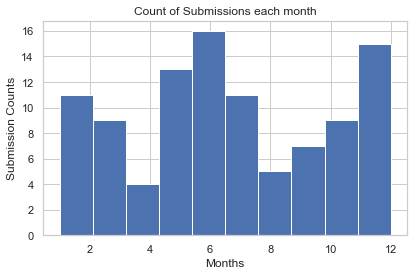

In [20]:
import seaborn as sns
fig, ax = plt.subplots()
#plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
ax.set_ylabel('Submission Counts')
ax.set_xlabel('Months')
ax.set_title(r'Count of Submissions each month')
plt.hist(submission_df['submission_month'])
fig.tight_layout()
#plt.show(figsize=(10,5))
plt.savefig("submission_bar_chart.png")

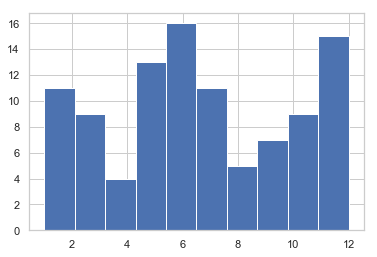

<Figure size 432x288 with 0 Axes>

In [9]:
len(submission_df[submission_df['submission_month']==12])

9

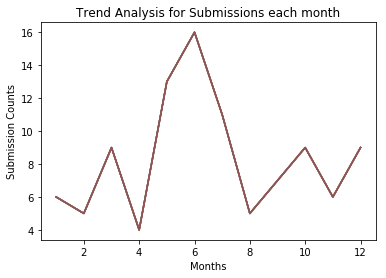

In [10]:
fig, ax = plt.subplots()

ax.plot(grouped_month.count())
ax.set_ylabel('Submission Counts')
ax.set_xlabel('Months')
ax.set_title(r'Trend Analysis for Submissions each month')

plt.savefig("submission_line_chart.png")

# Comments 

In [11]:
#grouping comments by month
c_grouped_month=comments_df.groupby('comment_month')
c_grouped_year=comments_df.groupby('comment_year')

NameError: name 'comments_df' is not defined

In [ ]:
c_grouped_month.count()

In [ ]:
fig, ax = plt.subplots()

ax.plot(c_grouped_month.count())
ax.set_ylabel('Comments Counts')
ax.set_xlabel('Months')
ax.set_title(r'Trend Analysis for Comments each month')

plt.savefig("comments_line_chart.png")

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Comments Counts')
ax.set_xlabel('Months')
ax.set_title(r'Count of comments each month')
plt.hist(comments_df['comment_month'])
fig.tight_layout()
plt.show()
plt.savefig("comments_bar_chart.png")

# Replies

In [ ]:
#grouping comments by month
r_grouped_month=replies_df.groupby('reply_month')
r_grouped_year=replies_df.groupby('reply_year')

In [ ]:
r_grouped_month.count()

In [ ]:
fig, ax = plt.subplots()

ax.plot(r_grouped_month.count())
ax.set_ylabel('Replies Counts')
ax.set_xlabel('Months')
ax.set_title(r'Trend Analysis for Replies each month')
plt.savefig("replies_line_chart.png")

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Replies Counts')
ax.set_xlabel('Months')
ax.set_title(r'Count of replies each month')
plt.hist(replies_df['reply_month'])
fig.tight_layout()
plt.show()

plt.savefig("replies_bar_chart.png")

# Generating Text Corpus

In [ ]:
submission_df.head()

In [ ]:
submission_df['title'][0]

In [ ]:
comments_df.head()

In [ ]:
replies_df.head()

## Merging Replies

In [95]:
replies_df.head(4)

,reply_id,comments_id,submission_id,reply_date,reply_year,reply_month,reply_day,reply_author,reply
0,dyhjk2a,dyhi85d,8h6aao,2018-05-05 12:28:47,2018,5,5,bonerdude420,I guess she's my type
1,dyhk85i,dyhi85d,8h6aao,2018-05-05 12:48:06,2018,5,5,CanadianUkr,Or they are so antisocial that they didn't sho...
2,dyhjt4w,dyhi85d,8h6aao,2018-05-05 12:36:07,2018,5,5,None,The way you broke up the sentence in the middl...
3,dyhp71i,dyhi85d,8h6aao,2018-05-05 14:45:58,2018,5,5,rutten187,"Nice box, eh?"


In [155]:
#def aggregate_replies_to_comments():
# grouping replies by comments id
grouped_replies=replies_df.groupby(['comments_id'])['reply'].apply(lambda x: "%s"% ','.join(x)).reset_index()
# merging aggregated replies with comments
#grouped_comments=pd.merge(comments_df,grouped_replies, on ='comments_id')
grouped_comments = pd.merge(comments_df[['comments_id','submission_id','comment']], grouped_replies, on='comments_id')
# joining "comments and reply columns"
grouped_comments['comment']= grouped_comments['comment'] + grouped_comments['reply']
# taking subset
grouped_comments=
grouped_comments.head(3)

,comments_id,submission_id,comment
0,dyhi85d,8h6aao,"It's strange, but I swear you and your new wif..."
1,dyhfwly,8h6aao,"That is really nice, u/bonerdude420Is she taki..."
2,dyhdpyi,8h6aao,Taken near Murren in Oct 2016. Only people the...


In [160]:
test=pd.read_csv("../data/aggregated_data/group_by_comments.csv", )
test.head(3)
len(test.comment[0])

1497

In [161]:
#len(grouped_comments.submission_id.unique())
grouped_replies.head(4)
replies_df.head(3)

,reply_id,comments_id,submission_id,reply_date,reply_year,reply_month,reply_day,reply_author,reply
0,dyhjk2a,dyhi85d,8h6aao,2018-05-05 12:28:47,2018,5,5,bonerdude420,I guess she's my type
1,dyhk85i,dyhi85d,8h6aao,2018-05-05 12:48:06,2018,5,5,CanadianUkr,Or they are so antisocial that they didn't sho...
2,dyhjt4w,dyhi85d,8h6aao,2018-05-05 12:36:07,2018,5,5,None,The way you broke up the sentence in the middl...


In [138]:
# Submission 
#grouped_comments.query("comments_id=='dyhi85d'")
grouped_comments2=grouped_comments.groupby(['submission_id'])['comment'].apply(lambda x: "%s"% ','.join(x)).reset_index()



In [145]:
grouped_comments2.shape

(100, 2)

In [139]:
grouped_comments2.head(3)

,submission_id,comment
0,813bmu,I just returned from 6 weeks in Arunachal Prad...
1,81a9w5,Fuck. There’s no better feeling than the feeli...
2,850ktw,You drove that all the way from New York? Wow....


In [146]:
#submission_df.head(3)
submission_df.shape

(100, 7)

In [142]:
grouped_submissions=pd.merge(submission_df,grouped_comments, on ='submission_id')

In [141]:
grouped_comments2.query('submission_id=="8h6aao"')

,submission_id,comment
13,8h6aao,"It's strange, but I swear you and your new wif..."


In [143]:
grouped_submissions.shape

(10018, 9)

## Merging with comments

In [118]:
#merging comments and grouped replies dataframe to get two columns "comments" and "replies" for each comments id .

grouped_comments=pd.merge(comments_df,grouped_replies, on ='comments_id')

In [119]:
# joining "comments and reply columns"
grouped_comments['comment']= grouped_comments['comment'] + grouped_comments['reply']

#selecting only comments and submission_id column
grouped_comments=grouped_comments.iloc[:,[0,7]]

In [121]:
grouped_comments.head(3)

,comments_id,comment
0,dyhi85d,"It's strange, but I swear you and your new wif..."
1,dyhfwly,"That is really nice, u/bonerdude420Is she taki..."
2,dyhdpyi,Taken near Murren in Oct 2016. Only people the...


In [122]:
#combining all comment with same submission_id
#grouped_comments=grouped_comments.groupby(['submission_id'])['comment'].apply(lambda x: "%s" % ', '.join(x)).reset_index()


In [ ]:
grouped_comments.head()

## Merging  with Submission 

In [ ]:
#merging submission and grouped comments dataframe to get two columns "comments" and "submission" for each submission id .
grouped_submission=pd.merge(submission_df,grouped_comments, on ='submission_id')

In [ ]:
# joining "comments and title columns"
grouped_submission['comment']= grouped_submission['title'] + grouped_submission['comment']

#selecting only title and submission_id column
grouped_submission=grouped_submission.iloc[:,[0,6,7]]

In [ ]:
#selecting only title and submission_id column
grouped_submission=grouped_submission.iloc[:,[0,6,7]]

In [ ]:
grouped_submission.head()

# Processing Text Data

In [ ]:
text_corpus=grouped_submission

In [ ]:
text_corpus.rename(index=str, columns={'title': 'submission_title', 'comment': 'text'},inplace=True)

In [ ]:
#writing text corpus to csv file
text_corpus.to_csv("text_corpus.csv",index=False)

In [4]:
#reading file from text corpus csv
text_corpus=pd.read_csv("text_corpus.csv")

In [5]:
text_corpus.head()

,submission_id,submission_title,text
0,8h6aao,Wife and I hate big social events and love tra...,Wife and I hate big social events and love tra...
1,95l2e6,The exact moment I took a step too close to th...,The exact moment I took a step too close to th...
2,8yj2tg,Wandering around Kyoto at night,Wandering around Kyoto at nightKyoto is amazin...
3,8i4939,I heard this place had stunning views but I ju...,I heard this place had stunning views but I ju...
4,85awza,Went to the top of the Eiffel Tower and there ...,Went to the top of the Eiffel Tower and there ...


In [ ]:
text_corpus.shape

# Cleaning Text Data
1. Removing white space from start and end of string 
2. Removing URL and special character
3. Lemmatization
4. Removing stop words


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
stopWords = set(stopwords.words('english'))
lt = WordNetLemmatizer()
import re

In [7]:
def tokenize(text):
    return [token.strip().lower() for token in text.split()]


def remove_stop_words(text):
     return [word for word in text if word not in stopWords]
    
def lemmatize(text):
    return [(lt.lemmatize(x)) for x in text]

In [8]:

def clean_text(text):
    #regex to remove URL from string 
    text=re.sub('http://\S+|https://\S+', '', text)    
    #regex to remove special characters from string except [: ? ! . , ']
    text=re.sub(r"[^a-zA-Z0-9?!',.]"," ",text)
    
    tokenized_text=tokenize(text)
    lemmatized_text=lemmatize(tokenized_text)
    cleaned_text=remove_stop_words(lemmatized_text)

    return ' '.join(token for token in cleaned_text)

Approach 1: Using spacy to identify - Org , destinations, brands. Uses default library

#### Expected:
- Top_destination: Name of places, countries 
- Top_organization: hotel names, brands, airport name
- Top product: travel type, activities


#### Observation:
- Top_destination: moderate result 
- Top_organization: bad result - gives org name but not related to travel
- Top: product: bad - gives product/org name but not really relevant

#### Work to improve NER recognition
- Approach 1: From the received results, apply Word2Vec
- Approach 2: Rule based parsing
- Approach 3: Apply LDA 

TODO: 
- Extract Aspects/Nouns from Submission topics's text to generate tags for this submission.
- Include submission column

>`eg: I would like to go to Switzerland for my marriage` - Switzerland, Marriage

### Main

In [9]:
# clean data before processing 
text_corpus['cleaned_text']=text_corpus['text'].apply(clean_text)

In [10]:
#removing previous "text" column
text_corpus=text_corpus.iloc[:,[0,1,3]]

In [11]:
text_corpus.head(3)

,submission_id,submission_title,cleaned_text
0,8h6aao,Wife and I hate big social events and love tra...,wife hate big social event love traveling. rat...
1,95l2e6,The exact moment I took a step too close to th...,exact moment took step close border north sout...
2,8yj2tg,Wandering around Kyoto at night,wandering around kyoto nightkyoto amazing. one...


In [ ]:
#writing text corpus to csv file
text_corpus.to_csv("text_corpus.csv",index=False)